# Fine-tuning

In [1]:
import numpy as np
import pathlib
import torch
from torch import nn
from torch.utils.tensorboard import SummaryWriter

import utils

DATA_PATH = pathlib.Path('../data')
RUNS_PATH = pathlib.Path('runs/softmax-reg')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

To exploit pre-trained models, which are usually trained on RGB image data, the depth channel is not used throughout this notebook.


Trainin set: 8370 samples of shape (28, 28, 3)

Sample: 5280
Label: ok


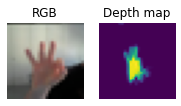


Validation set: 1440 samples of shape (28, 28, 3)

Sample: 362
Label: hi


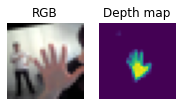

In [3]:
# Dataset filenames
train_ds = utils.HandDataset(DATA_PATH/'training_set.mat', depth=False)
valid_ds = utils.HandDataset(DATA_PATH/'validation_set.mat', depth=False)
# test_ds = utils.HandDataset(DATA_PATH/'test_set.mat')

# Data loaders
batch_size = 256
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=batch_size, shuffle=False)
# test_dl = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False)

# Visualization
print(f'\nTrainin set: {train_ds}')
train_ds.show_sample()
print(f'\nValidation set: {valid_ds}')
valid_ds.show_sample()
# print(f'\nTest set: {test_ds}')
# test_ds.show_sample()

Is there a pre-trained network model that accepts input sizes (28, 28, 3)?